# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.017149607938732093


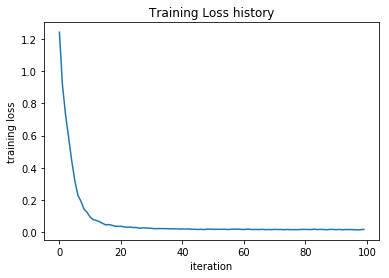

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

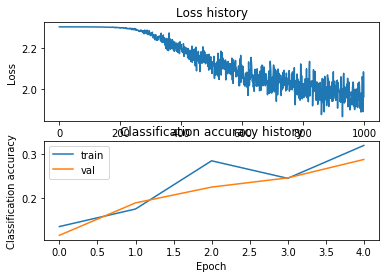

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

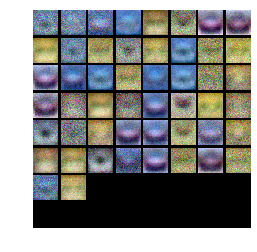

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

- 因为现在应该处于欠拟合的状态，先从batch_size、learning_rate、hidden_size这3个角度先开始让它达到过拟合的状态，然后调整reg、使用dropout来增加泛化能力，使在验证集上的准确率上升。

In [12]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
best_val = -1
input_size = 32 * 32 * 3
num_classes = 10
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2]
batch_sizes = [128, 256, 512]
regularization_strengths = [0.15, 0.30, 0.45, 0.60, 0.75]
hidden_sizes = [50, 100, 150, 200]
for lr in learning_rates:
    for bs in batch_sizes:
        for rs in regularization_strengths:
            for hs in hidden_sizes:
                myNet = TwoLayerNet(input_size, hs, num_classes)
                print('lr = %f, bs = %d, rs = %f, hs = %d,' % (lr, bs, rs, hs))
                status = myNet.train(X_train, y_train, X_val, y_val,
                                    learning_rate=lr, reg=rs,
                                     num_iters=2000, batch_size=bs,
                                    learning_rate_decay=0.95, verbose=True)
                val_accuracy = (myNet.predict(X_val) == y_val).mean()
                print('val_acc = %f' % (val_accuracy))
                print('==============================================================')
                if val_accuracy > best_val:
                    best_val = val_accuracy
                    best_net = myNet

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


lr = 0.000010, bs = 128, rs = 0.150000, hs = 50,
iteration 0 / 2000: loss 2.302832
iteration 100 / 2000: loss 2.302807
iteration 200 / 2000: loss 2.302759
iteration 300 / 2000: loss 2.302746
iteration 400 / 2000: loss 2.302725
iteration 500 / 2000: loss 2.302659
iteration 600 / 2000: loss 2.302683
iteration 700 / 2000: loss 2.302626
iteration 800 / 2000: loss 2.302615
iteration 900 / 2000: loss 2.302493
iteration 1000 / 2000: loss 2.302377
iteration 1100 / 2000: loss 2.302211
iteration 1200 / 2000: loss 2.302454
iteration 1300 / 2000: loss 2.302169
iteration 1400 / 2000: loss 2.301260
iteration 1500 / 2000: loss 2.301620
iteration 1600 / 2000: loss 2.300348
iteration 1700 / 2000: loss 2.299341
iteration 1800 / 2000: loss 2.298880
iteration 1900 / 2000: loss 2.298555
val_acc = 0.175000
lr = 0.000010, bs = 128, rs = 0.150000, hs = 100,
iteration 0 / 2000: loss 2.303026
iteration 100 / 2000: loss 2.303011
iteration 200 / 2000: loss 2.302976
iteration 300 / 2000: loss 2.302934
iteration 40

iteration 1200 / 2000: loss 2.302706
iteration 1300 / 2000: loss 2.302108
iteration 1400 / 2000: loss 2.301949
iteration 1500 / 2000: loss 2.301428
iteration 1600 / 2000: loss 2.300365
iteration 1700 / 2000: loss 2.300780
iteration 1800 / 2000: loss 2.298907
iteration 1900 / 2000: loss 2.291559
val_acc = 0.189000
lr = 0.000010, bs = 128, rs = 0.450000, hs = 150,
iteration 0 / 2000: loss 2.304655
iteration 100 / 2000: loss 2.304581
iteration 200 / 2000: loss 2.304498
iteration 300 / 2000: loss 2.304404
iteration 400 / 2000: loss 2.304383
iteration 500 / 2000: loss 2.304086
iteration 600 / 2000: loss 2.304052
iteration 700 / 2000: loss 2.303860
iteration 800 / 2000: loss 2.303367
iteration 900 / 2000: loss 2.303270
iteration 1000 / 2000: loss 2.302723
iteration 1100 / 2000: loss 2.303263
iteration 1200 / 2000: loss 2.302579
iteration 1300 / 2000: loss 2.301466
iteration 1400 / 2000: loss 2.299630
iteration 1500 / 2000: loss 2.299025
iteration 1600 / 2000: loss 2.297965
iteration 1700 / 2

iteration 100 / 2000: loss 2.307073
iteration 200 / 2000: loss 2.307031
iteration 300 / 2000: loss 2.306837
iteration 400 / 2000: loss 2.306915
iteration 500 / 2000: loss 2.306510
iteration 600 / 2000: loss 2.306561
iteration 700 / 2000: loss 2.306065
iteration 800 / 2000: loss 2.305951
iteration 900 / 2000: loss 2.305342
iteration 1000 / 2000: loss 2.304866
iteration 1100 / 2000: loss 2.304358
iteration 1200 / 2000: loss 2.303873
iteration 1300 / 2000: loss 2.303669
iteration 1400 / 2000: loss 2.302461
iteration 1500 / 2000: loss 2.300397
iteration 1600 / 2000: loss 2.300310
iteration 1700 / 2000: loss 2.301282
iteration 1800 / 2000: loss 2.296643
iteration 1900 / 2000: loss 2.292565
val_acc = 0.195000
lr = 0.000010, bs = 256, rs = 0.150000, hs = 50,
iteration 0 / 2000: loss 2.302811
iteration 100 / 2000: loss 2.302778
iteration 200 / 2000: loss 2.302772
iteration 300 / 2000: loss 2.302741
iteration 400 / 2000: loss 2.302712
iteration 500 / 2000: loss 2.302653
iteration 600 / 2000: lo

iteration 1400 / 2000: loss 2.302486
iteration 1500 / 2000: loss 2.302060
iteration 1600 / 2000: loss 2.301570
iteration 1700 / 2000: loss 2.301005
iteration 1800 / 2000: loss 2.300428
iteration 1900 / 2000: loss 2.299948
val_acc = 0.207000
lr = 0.000010, bs = 256, rs = 0.450000, hs = 100,
iteration 0 / 2000: loss 2.303986
iteration 100 / 2000: loss 2.303917
iteration 200 / 2000: loss 2.303887
iteration 300 / 2000: loss 2.303842
iteration 400 / 2000: loss 2.303774
iteration 500 / 2000: loss 2.303681
iteration 600 / 2000: loss 2.303564
iteration 700 / 2000: loss 2.303519
iteration 800 / 2000: loss 2.303437
iteration 900 / 2000: loss 2.303312
iteration 1000 / 2000: loss 2.303159
iteration 1100 / 2000: loss 2.302760
iteration 1200 / 2000: loss 2.302496
iteration 1300 / 2000: loss 2.302323
iteration 1400 / 2000: loss 2.301498
iteration 1500 / 2000: loss 2.301806
iteration 1600 / 2000: loss 2.299811
iteration 1700 / 2000: loss 2.299375
iteration 1800 / 2000: loss 2.299710
iteration 1900 / 2

iteration 300 / 2000: loss 2.305823
iteration 400 / 2000: loss 2.305710
iteration 500 / 2000: loss 2.305589
iteration 600 / 2000: loss 2.305544
iteration 700 / 2000: loss 2.305385
iteration 800 / 2000: loss 2.305176
iteration 900 / 2000: loss 2.305045
iteration 1000 / 2000: loss 2.304891
iteration 1100 / 2000: loss 2.304420
iteration 1200 / 2000: loss 2.303944
iteration 1300 / 2000: loss 2.303554
iteration 1400 / 2000: loss 2.303286
iteration 1500 / 2000: loss 2.302265
iteration 1600 / 2000: loss 2.302297
iteration 1700 / 2000: loss 2.300376
iteration 1800 / 2000: loss 2.297181
iteration 1900 / 2000: loss 2.297783
val_acc = 0.191000
lr = 0.000010, bs = 256, rs = 0.750000, hs = 200,
iteration 0 / 2000: loss 2.307216
iteration 100 / 2000: loss 2.307141
iteration 200 / 2000: loss 2.307005
iteration 300 / 2000: loss 2.306905
iteration 400 / 2000: loss 2.306721
iteration 500 / 2000: loss 2.306580
iteration 600 / 2000: loss 2.306526
iteration 700 / 2000: loss 2.306031
iteration 800 / 2000: l

iteration 1600 / 2000: loss 2.297016
iteration 1700 / 2000: loss 2.296201
iteration 1800 / 2000: loss 2.292464
iteration 1900 / 2000: loss 2.290405
val_acc = 0.211000
lr = 0.000010, bs = 512, rs = 0.450000, hs = 50,
iteration 0 / 2000: loss 2.303249
iteration 100 / 2000: loss 2.303223
iteration 200 / 2000: loss 2.303185
iteration 300 / 2000: loss 2.303167
iteration 400 / 2000: loss 2.303112
iteration 500 / 2000: loss 2.303080
iteration 600 / 2000: loss 2.303006
iteration 700 / 2000: loss 2.302992
iteration 800 / 2000: loss 2.302799
iteration 900 / 2000: loss 2.302789
iteration 1000 / 2000: loss 2.302545
iteration 1100 / 2000: loss 2.302221
iteration 1200 / 2000: loss 2.302301
iteration 1300 / 2000: loss 2.301829
iteration 1400 / 2000: loss 2.301272
iteration 1500 / 2000: loss 2.300441
iteration 1600 / 2000: loss 2.299032
iteration 1700 / 2000: loss 2.299471
iteration 1800 / 2000: loss 2.298515
iteration 1900 / 2000: loss 2.295664
val_acc = 0.218000
lr = 0.000010, bs = 512, rs = 0.45000

iteration 500 / 2000: loss 2.304619
iteration 600 / 2000: loss 2.304499
iteration 700 / 2000: loss 2.304371
iteration 800 / 2000: loss 2.304324
iteration 900 / 2000: loss 2.304163
iteration 1000 / 2000: loss 2.303824
iteration 1100 / 2000: loss 2.303695
iteration 1200 / 2000: loss 2.303424
iteration 1300 / 2000: loss 2.303256
iteration 1400 / 2000: loss 2.302041
iteration 1500 / 2000: loss 2.302243
iteration 1600 / 2000: loss 2.300839
iteration 1700 / 2000: loss 2.300181
iteration 1800 / 2000: loss 2.299638
iteration 1900 / 2000: loss 2.297467
val_acc = 0.186000
lr = 0.000010, bs = 512, rs = 0.750000, hs = 150,
iteration 0 / 2000: loss 2.306059
iteration 100 / 2000: loss 2.305972
iteration 200 / 2000: loss 2.305904
iteration 300 / 2000: loss 2.305823
iteration 400 / 2000: loss 2.305733
iteration 500 / 2000: loss 2.305566
iteration 600 / 2000: loss 2.305461
iteration 700 / 2000: loss 2.305159
iteration 800 / 2000: loss 2.305125
iteration 900 / 2000: loss 2.304756
iteration 1000 / 2000: 

iteration 1800 / 2000: loss 1.721178
iteration 1900 / 2000: loss 1.774436
val_acc = 0.385000
lr = 0.000100, bs = 128, rs = 0.300000, hs = 200,
iteration 0 / 2000: loss 2.304345
iteration 100 / 2000: loss 2.303426
iteration 200 / 2000: loss 2.279235
iteration 300 / 2000: loss 2.234280
iteration 400 / 2000: loss 2.156789
iteration 500 / 2000: loss 2.096822
iteration 600 / 2000: loss 2.086896
iteration 700 / 2000: loss 1.991780
iteration 800 / 2000: loss 1.951167
iteration 900 / 2000: loss 1.910684
iteration 1000 / 2000: loss 1.851359
iteration 1100 / 2000: loss 1.866911
iteration 1200 / 2000: loss 1.834665
iteration 1300 / 2000: loss 1.841503
iteration 1400 / 2000: loss 1.913501
iteration 1500 / 2000: loss 1.890420
iteration 1600 / 2000: loss 1.861103
iteration 1700 / 2000: loss 1.814296
iteration 1800 / 2000: loss 1.770734
iteration 1900 / 2000: loss 1.655124
val_acc = 0.385000
lr = 0.000100, bs = 128, rs = 0.450000, hs = 50,
iteration 0 / 2000: loss 2.303277
iteration 100 / 2000: loss 

iteration 700 / 2000: loss 1.979259
iteration 800 / 2000: loss 1.949323
iteration 900 / 2000: loss 1.966795
iteration 1000 / 2000: loss 1.924289
iteration 1100 / 2000: loss 1.942689
iteration 1200 / 2000: loss 2.015982
iteration 1300 / 2000: loss 1.881857
iteration 1400 / 2000: loss 1.956401
iteration 1500 / 2000: loss 1.905733
iteration 1600 / 2000: loss 1.778933
iteration 1700 / 2000: loss 1.892144
iteration 1800 / 2000: loss 1.779831
iteration 1900 / 2000: loss 1.746568
val_acc = 0.369000
lr = 0.000100, bs = 128, rs = 0.750000, hs = 100,
iteration 0 / 2000: loss 2.304910
iteration 100 / 2000: loss 2.304036
iteration 200 / 2000: loss 2.295601
iteration 300 / 2000: loss 2.251479
iteration 400 / 2000: loss 2.106546
iteration 500 / 2000: loss 2.117142
iteration 600 / 2000: loss 2.043760
iteration 700 / 2000: loss 2.016870
iteration 800 / 2000: loss 1.955731
iteration 900 / 2000: loss 1.962843
iteration 1000 / 2000: loss 1.991451
iteration 1100 / 2000: loss 1.975806
iteration 1200 / 2000

val_acc = 0.382000
lr = 0.000100, bs = 256, rs = 0.300000, hs = 150,
iteration 0 / 2000: loss 2.304003
iteration 100 / 2000: loss 2.302494
iteration 200 / 2000: loss 2.290480
iteration 300 / 2000: loss 2.209883
iteration 400 / 2000: loss 2.200922
iteration 500 / 2000: loss 2.035574
iteration 600 / 2000: loss 2.047068
iteration 700 / 2000: loss 1.999452
iteration 800 / 2000: loss 1.999813
iteration 900 / 2000: loss 1.853593
iteration 1000 / 2000: loss 1.872201
iteration 1100 / 2000: loss 1.842429
iteration 1200 / 2000: loss 1.774776
iteration 1300 / 2000: loss 1.890939
iteration 1400 / 2000: loss 1.893559
iteration 1500 / 2000: loss 1.868875
iteration 1600 / 2000: loss 1.785915
iteration 1700 / 2000: loss 1.714429
iteration 1800 / 2000: loss 1.718942
iteration 1900 / 2000: loss 1.769015
val_acc = 0.387000
lr = 0.000100, bs = 256, rs = 0.300000, hs = 200,
iteration 0 / 2000: loss 2.304467
iteration 100 / 2000: loss 2.302560
iteration 200 / 2000: loss 2.285926
iteration 300 / 2000: loss 2

iteration 1000 / 2000: loss 1.940863
iteration 1100 / 2000: loss 1.958322
iteration 1200 / 2000: loss 1.916187
iteration 1300 / 2000: loss 1.876779
iteration 1400 / 2000: loss 1.770336
iteration 1500 / 2000: loss 1.782943
iteration 1600 / 2000: loss 1.907575
iteration 1700 / 2000: loss 1.765830
iteration 1800 / 2000: loss 1.733530
iteration 1900 / 2000: loss 1.739959
val_acc = 0.379000
lr = 0.000100, bs = 256, rs = 0.750000, hs = 50,
iteration 0 / 2000: loss 2.303755
iteration 100 / 2000: loss 2.303307
iteration 200 / 2000: loss 2.300588
iteration 300 / 2000: loss 2.282850
iteration 400 / 2000: loss 2.187693
iteration 500 / 2000: loss 2.141344
iteration 600 / 2000: loss 2.082276
iteration 700 / 2000: loss 2.067267
iteration 800 / 2000: loss 1.971062
iteration 900 / 2000: loss 1.989660
iteration 1000 / 2000: loss 1.951492
iteration 1100 / 2000: loss 1.868356
iteration 1200 / 2000: loss 1.911116
iteration 1300 / 2000: loss 1.921828
iteration 1400 / 2000: loss 1.921052
iteration 1500 / 20

iteration 100 / 2000: loss 2.302792
iteration 200 / 2000: loss 2.295475
iteration 300 / 2000: loss 2.236997
iteration 400 / 2000: loss 2.184689
iteration 500 / 2000: loss 2.120233
iteration 600 / 2000: loss 2.057436
iteration 700 / 2000: loss 2.057914
iteration 800 / 2000: loss 2.008628
iteration 900 / 2000: loss 1.932827
iteration 1000 / 2000: loss 1.932272
iteration 1100 / 2000: loss 1.874242
iteration 1200 / 2000: loss 1.862548
iteration 1300 / 2000: loss 1.846335
iteration 1400 / 2000: loss 1.872312
iteration 1500 / 2000: loss 1.797839
iteration 1600 / 2000: loss 1.773671
iteration 1700 / 2000: loss 1.753524
iteration 1800 / 2000: loss 1.797376
iteration 1900 / 2000: loss 1.789305
val_acc = 0.383000
lr = 0.000100, bs = 512, rs = 0.300000, hs = 150,
iteration 0 / 2000: loss 2.303947
iteration 100 / 2000: loss 2.302590
iteration 200 / 2000: loss 2.287089
iteration 300 / 2000: loss 2.217868
iteration 400 / 2000: loss 2.129363
iteration 500 / 2000: loss 2.062749
iteration 600 / 2000: l

iteration 1400 / 2000: loss 1.914106
iteration 1500 / 2000: loss 1.808299
iteration 1600 / 2000: loss 1.884947
iteration 1700 / 2000: loss 1.776900
iteration 1800 / 2000: loss 1.762659
iteration 1900 / 2000: loss 1.813003
val_acc = 0.377000
lr = 0.000100, bs = 512, rs = 0.600000, hs = 200,
iteration 0 / 2000: loss 2.306264
iteration 100 / 2000: loss 2.304616
iteration 200 / 2000: loss 2.289471
iteration 300 / 2000: loss 2.228836
iteration 400 / 2000: loss 2.148014
iteration 500 / 2000: loss 2.074562
iteration 600 / 2000: loss 2.027698
iteration 700 / 2000: loss 2.022926
iteration 800 / 2000: loss 1.960409
iteration 900 / 2000: loss 1.929019
iteration 1000 / 2000: loss 1.885209
iteration 1100 / 2000: loss 1.870917
iteration 1200 / 2000: loss 1.889490
iteration 1300 / 2000: loss 1.837286
iteration 1400 / 2000: loss 1.849834
iteration 1500 / 2000: loss 1.859736
iteration 1600 / 2000: loss 1.805127
iteration 1700 / 2000: loss 1.781460
iteration 1800 / 2000: loss 1.734405
iteration 1900 / 2

iteration 300 / 2000: loss 1.860049
iteration 400 / 2000: loss 1.533056
iteration 500 / 2000: loss 1.618458
iteration 600 / 2000: loss 1.583926
iteration 700 / 2000: loss 1.586239
iteration 800 / 2000: loss 1.553677
iteration 900 / 2000: loss 1.581632
iteration 1000 / 2000: loss 1.658563
iteration 1100 / 2000: loss 1.328023
iteration 1200 / 2000: loss 1.583599
iteration 1300 / 2000: loss 1.703395
iteration 1400 / 2000: loss 1.449397
iteration 1500 / 2000: loss 1.551183
iteration 1600 / 2000: loss 1.774963
iteration 1700 / 2000: loss 1.496162
iteration 1800 / 2000: loss 1.562660
iteration 1900 / 2000: loss 1.531785
val_acc = 0.492000
lr = 0.001000, bs = 128, rs = 0.300000, hs = 100,
iteration 0 / 2000: loss 2.303523
iteration 100 / 2000: loss 1.942562
iteration 200 / 2000: loss 1.734333
iteration 300 / 2000: loss 1.821513
iteration 400 / 2000: loss 1.590168
iteration 500 / 2000: loss 1.562346
iteration 600 / 2000: loss 1.581173
iteration 700 / 2000: loss 1.597263
iteration 800 / 2000: l

iteration 1600 / 2000: loss 1.446380
iteration 1700 / 2000: loss 1.661638
iteration 1800 / 2000: loss 1.653669
iteration 1900 / 2000: loss 1.594850
val_acc = 0.497000
lr = 0.001000, bs = 128, rs = 0.600000, hs = 150,
iteration 0 / 2000: loss 2.305348
iteration 100 / 2000: loss 2.004860
iteration 200 / 2000: loss 1.764804
iteration 300 / 2000: loss 1.752135
iteration 400 / 2000: loss 1.592948
iteration 500 / 2000: loss 1.799817
iteration 600 / 2000: loss 1.759363
iteration 700 / 2000: loss 1.653139
iteration 800 / 2000: loss 1.492771
iteration 900 / 2000: loss 1.689015
iteration 1000 / 2000: loss 1.633447
iteration 1100 / 2000: loss 1.714745
iteration 1200 / 2000: loss 1.587267
iteration 1300 / 2000: loss 1.664356
iteration 1400 / 2000: loss 1.685726
iteration 1500 / 2000: loss 1.553658
iteration 1600 / 2000: loss 1.488537
iteration 1700 / 2000: loss 1.530955
iteration 1800 / 2000: loss 1.674912
iteration 1900 / 2000: loss 1.570565
val_acc = 0.477000
lr = 0.001000, bs = 128, rs = 0.6000

iteration 500 / 2000: loss 1.590232
iteration 600 / 2000: loss 1.511720
iteration 700 / 2000: loss 1.474702
iteration 800 / 2000: loss 1.359270
iteration 900 / 2000: loss 1.398789
iteration 1000 / 2000: loss 1.461540
iteration 1100 / 2000: loss 1.457911
iteration 1200 / 2000: loss 1.371580
iteration 1300 / 2000: loss 1.371564
iteration 1400 / 2000: loss 1.442040
iteration 1500 / 2000: loss 1.358130
iteration 1600 / 2000: loss 1.371736
iteration 1700 / 2000: loss 1.368874
iteration 1800 / 2000: loss 1.402169
iteration 1900 / 2000: loss 1.314128
val_acc = 0.515000
lr = 0.001000, bs = 256, rs = 0.300000, hs = 50,
iteration 0 / 2000: loss 2.303042
iteration 100 / 2000: loss 1.945959
iteration 200 / 2000: loss 1.808443
iteration 300 / 2000: loss 1.727062
iteration 400 / 2000: loss 1.690016
iteration 500 / 2000: loss 1.643186
iteration 600 / 2000: loss 1.565964
iteration 700 / 2000: loss 1.497361
iteration 800 / 2000: loss 1.631598
iteration 900 / 2000: loss 1.496374
iteration 1000 / 2000: l

iteration 1800 / 2000: loss 1.527385
iteration 1900 / 2000: loss 1.569792
val_acc = 0.495000
lr = 0.001000, bs = 256, rs = 0.600000, hs = 100,
iteration 0 / 2000: loss 2.304409
iteration 100 / 2000: loss 1.912992
iteration 200 / 2000: loss 1.799671
iteration 300 / 2000: loss 1.697394
iteration 400 / 2000: loss 1.656774
iteration 500 / 2000: loss 1.680249
iteration 600 / 2000: loss 1.674536
iteration 700 / 2000: loss 1.509479
iteration 800 / 2000: loss 1.503013
iteration 900 / 2000: loss 1.659829
iteration 1000 / 2000: loss 1.650427
iteration 1100 / 2000: loss 1.677467
iteration 1200 / 2000: loss 1.626352
iteration 1300 / 2000: loss 1.498180
iteration 1400 / 2000: loss 1.523711
iteration 1500 / 2000: loss 1.499184
iteration 1600 / 2000: loss 1.560224
iteration 1700 / 2000: loss 1.498162
iteration 1800 / 2000: loss 1.557387
iteration 1900 / 2000: loss 1.510591
val_acc = 0.508000
lr = 0.001000, bs = 256, rs = 0.600000, hs = 150,
iteration 0 / 2000: loss 2.305361
iteration 100 / 2000: loss

iteration 700 / 2000: loss 1.519363
iteration 800 / 2000: loss 1.507014
iteration 900 / 2000: loss 1.456032
iteration 1000 / 2000: loss 1.429848
iteration 1100 / 2000: loss 1.350445
iteration 1200 / 2000: loss 1.442111
iteration 1300 / 2000: loss 1.359967
iteration 1400 / 2000: loss 1.309159
iteration 1500 / 2000: loss 1.275757
iteration 1600 / 2000: loss 1.397591
iteration 1700 / 2000: loss 1.257994
iteration 1800 / 2000: loss 1.366693
iteration 1900 / 2000: loss 1.253563
val_acc = 0.488000
lr = 0.001000, bs = 512, rs = 0.150000, hs = 200,
iteration 0 / 2000: loss 2.303515
iteration 100 / 2000: loss 1.917187
iteration 200 / 2000: loss 1.708087
iteration 300 / 2000: loss 1.619704
iteration 400 / 2000: loss 1.616932
iteration 500 / 2000: loss 1.453313
iteration 600 / 2000: loss 1.407077
iteration 700 / 2000: loss 1.478212
iteration 800 / 2000: loss 1.462390
iteration 900 / 2000: loss 1.470659
iteration 1000 / 2000: loss 1.373062
iteration 1100 / 2000: loss 1.331491
iteration 1200 / 2000

val_acc = 0.503000
lr = 0.001000, bs = 512, rs = 0.600000, hs = 50,
iteration 0 / 2000: loss 2.303520
iteration 100 / 2000: loss 1.931334
iteration 200 / 2000: loss 1.840255
iteration 300 / 2000: loss 1.745795
iteration 400 / 2000: loss 1.672404
iteration 500 / 2000: loss 1.666208
iteration 600 / 2000: loss 1.597240
iteration 700 / 2000: loss 1.528783
iteration 800 / 2000: loss 1.633012
iteration 900 / 2000: loss 1.611298
iteration 1000 / 2000: loss 1.495224
iteration 1100 / 2000: loss 1.478139
iteration 1200 / 2000: loss 1.513229
iteration 1300 / 2000: loss 1.594746
iteration 1400 / 2000: loss 1.529941
iteration 1500 / 2000: loss 1.604866
iteration 1600 / 2000: loss 1.522176
iteration 1700 / 2000: loss 1.644912
iteration 1800 / 2000: loss 1.494499
iteration 1900 / 2000: loss 1.525988
val_acc = 0.501000
lr = 0.001000, bs = 512, rs = 0.600000, hs = 100,
iteration 0 / 2000: loss 2.304442
iteration 100 / 2000: loss 1.899735
iteration 200 / 2000: loss 1.751769
iteration 300 / 2000: loss 1.

E:\workspace\my_github\qyt_python_collections\ucas\计算机视觉\Assignment1\cs231n\classifiers\neural_net.py:106: RuntimeWarning: divide by zero encountered in log
  correct_logprobs = -np.log(probs[range(N), y])


iteration 100 / 2000: loss inf
iteration 200 / 2000: loss inf
iteration 300 / 2000: loss inf


E:\workspace\my_github\qyt_python_collections\ucas\计算机视觉\Assignment1\cs231n\classifiers\neural_net.py:103: RuntimeWarning: overflow encountered in subtract
  scores = scores - np.max(scores, axis=1).reshape(-1, 1)
E:\workspace\my_github\qyt_python_collections\ucas\计算机视觉\Assignment1\cs231n\classifiers\neural_net.py:103: RuntimeWarning: invalid value encountered in subtract
  scores = scores - np.max(scores, axis=1).reshape(-1, 1)
E:\workspace\my_github\qyt_python_collections\ucas\计算机视觉\Assignment1\cs231n\classifiers\neural_net.py:126: RuntimeWarning: invalid value encountered in greater
  grad_hidden_in = (hidden_out > 0) * grad_hidden_out


iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
val_acc = 0.087000
lr = 0.010000, bs = 128, rs = 0.150000, hs = 100,
iteration 0 / 2000: loss 2.303054
iteration 100 / 2000: loss inf
iteration 200 / 2000: loss inf
iteration 300 / 2000: loss inf
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 /

iteration 100 / 2000: loss inf
iteration 200 / 2000: loss inf
iteration 300 / 2000: loss inf
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
val_acc = 0.087000
lr = 0.010000, bs = 128, rs = 0.600000, hs = 50,
iteration 0 / 2000: loss 2.303515
iteration 100 / 2000: loss inf
iteration 200 / 2000: loss inf
iteration 300 / 2000: loss inf
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 200

iteration 1900 / 2000: loss nan
val_acc = 0.087000
lr = 0.010000, bs = 256, rs = 0.150000, hs = 150,
iteration 0 / 2000: loss 2.303312
iteration 100 / 2000: loss inf
iteration 200 / 2000: loss inf
iteration 300 / 2000: loss inf
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
val_acc = 0.087000
lr = 0.010000, bs = 256, rs = 0.150000, hs = 200,
iteration 0 / 2000: loss 2.303492
iteration 100 / 2000: loss inf
iteration 200 / 2000: loss inf
iteration 300 / 2000: loss inf
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteratio

iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
val_acc = 0.087000
lr = 0.010000, bs = 256, rs = 0.600000, hs = 100,
iteration 0 / 2000: loss 2.304403
iteration 100 / 2000: loss inf
iteration 200 / 2000: loss inf
iteration 300 / 2000: loss inf
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
val_acc = 0.087000
lr = 0.010000, bs = 256, rs = 0.600000, hs = 150,
itera

iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
val_acc = 0.087000
lr = 0.010000, bs = 512, rs = 0.300000, hs = 50,
iteration 0 / 2000: loss 2.303055
iteration 100 / 2000: loss inf
iteration 200 / 2000: loss inf
iteration 300 / 2000: loss inf
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 

iteration 100 / 2000: loss inf
iteration 200 / 2000: loss inf
iteration 300 / 2000: loss inf
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
val_acc = 0.087000
lr = 0.010000, bs = 512, rs = 0.600000, hs = 200,
iteration 0 / 2000: loss 2.306264
iteration 100 / 2000: loss inf
iteration 200 / 2000: loss inf
iteration 300 / 2000: loss inf
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 20

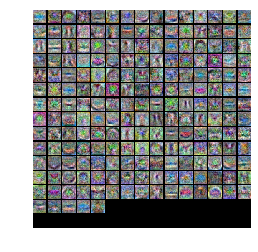

In [13]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [14]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.532


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

- 1、3

$\color{blue}{\textit Your Explanation:}$

- 测试集表现不好，训练集表现好。说明模型已经过拟合了。解决过拟合可以增大训练集，使用正则化（L2等、dropout）。而隐层神经元的个数则不能继续增加，此时，模型的拟合能力已经足够强大，如果继续增加模型复杂度，则过拟合现象会更加严重。